In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')

In [3]:
data.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [4]:
data.tail()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March
15006,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,10898,Enplaned,10898,2016,March


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

In [6]:
data.describe()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,15007.000000,15007.000000,15007.000000,15007.000000
mean,201045.073366,29240.521090,29331.917105,2010.385220
std,313.336196,58319.509284,58284.182219,3.137589
min,200507.000000,1.000000,1.000000,2005.000000
25%,200803.000000,5373.500000,5495.500000,2008.000000
50%,201011.000000,9210.000000,9354.000000,2010.000000
75%,201308.000000,21158.500000,21182.000000,2013.000000
max,201603.000000,659837.000000,659837.000000,2016.000000


In [7]:
data.shape

(15007, 16)

In [8]:
data.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data.shape

(14953, 16)

In [11]:
cat_col = []
for col in data.columns:
    if data[col].dtype == 'object':
        cat_col.append(col)
        print(f'{col} : {data[col].unique()}')
        print('-------------------------------------------------------')

Operating Airline : ['ATA Airlines' 'Air Canada ' 'Air China' 'Air France' 'Air New Zealand'
 'AirTran Airways' 'Alaska Airlines' 'All Nippon Airways'
 'American Airlines' 'American Eagle Airlines' 'Asiana Airlines'
 'Atlantic Southeast Airlines' 'BelAir Airlines' 'British Airways'
 'Cathay Pacific' 'China Airlines' 'Delta Air Lines' 'EVA Airways'
 'Frontier Airlines' 'Hawaiian Airlines' 'Horizon Air ' 'Icelandair'
 'Independence Air' 'Japan Airlines' 'KLM Royal Dutch Airlines'
 'Korean Air Lines' 'Lufthansa German Airlines' 'Mesa Airlines'
 'Mexicana Airlines' 'Midwest Airlines' 'Northwest Airlines'
 'Philippine Airlines' 'Singapore Airlines' 'SkyWest Airlines'
 'Sun Country Airlines' 'TACA' 'US Airways' 'United Airlines'
 'United Airlines - Pre 07/01/2013' 'Virgin Atlantic' 'WestJet Airlines'
 'Miami Air International' 'Air Canada Jazz' 'Qantas Airways'
 'Ameriflight' 'Spirit Airlines' 'Xtra Airways'
 'Evergreen International Airlines' 'Aeromexico' 'JetBlue Airways '
 'ExpressJet Air

In [19]:
for col in data.columns:
    print(f'{col} : {data[col].nunique()} labels')

Activity Period : 129 labels
Operating Airline : 73 labels
Operating Airline IATA Code : 73 labels
Published Airline : 64 labels
Published Airline IATA Code : 64 labels
GEO Summary : 2 labels
GEO Region : 9 labels
Activity Type Code : 3 labels
Price Category Code : 2 labels
Terminal : 5 labels
Boarding Area : 8 labels
Passenger Count : 11693 labels
Adjusted Activity Type Code : 3 labels
Adjusted Passenger Count : 11692 labels
Year : 12 labels
Month : 12 labels


### Dividing columns

In [20]:
ManyCate = ['Operating Airline','Operating Airline IATA Code',
        'Published Airline','Published Airline IATA Code']

Categorical = ['GEO Summary','GEO Region','Activity Type Code',
               'Price Category Code','Terminal','Adjusted Activity Type Code']

num_cols = ['Activity Period','Passenger Count','Adjusted Passenger Count']

In [21]:
mapper_month = {'January':1,'February':2,'March':3,'April':4,'May':5,
                'June':6,'July':7,'August':8,'September':9,'October':10,
                'November':11,'December':12}

mapper_boarding_area = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'Other':8}

In [22]:
data['Month'] = data['Month'].map(mapper_month)
data['Boarding Area'] = data['Boarding Area'].map(mapper_boarding_area)

In [23]:
dumy_data = pd.get_dummies(data,columns=Categorical,prefix='_',drop_first=True)
dumy_data.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,Boarding Area,Passenger Count,Adjusted Passenger Count,Year,Month,...,__US,__Enplaned,__Thru / Transit,__Other,__Other,__Terminal 1,__Terminal 2,__Terminal 3,__Enplaned,__Thru / Transit * 2
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,2,27271,27271,2005,7,...,1,0,0,0,0,1,0,0,0,0
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,2,29131,29131,2005,7,...,1,1,0,0,0,1,0,0,1,0
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,2,5415,10830,2005,7,...,1,0,1,0,0,1,0,0,0,1
3,200507,Air Canada,AC,Air Canada,AC,2,35156,35156,2005,7,...,0,0,0,1,0,1,0,0,0,0
4,200507,Air Canada,AC,Air Canada,AC,2,34090,34090,2005,7,...,0,1,0,1,0,1,0,0,1,0


In [24]:
for col in dumy_data[ManyCate].columns:
    print(f'{col} : {len(dumy_data[col].unique())}')

Operating Airline : 73
Operating Airline IATA Code : 73
Published Airline : 64
Published Airline IATA Code : 64


In [25]:
dumy_data['Published Airline IATA Code'].value_counts().sort_values(ascending=False).head(10)

UA     3752
AS      969
DL      803
AA      416
US      407
AC      380
VX      362
WN      309
F9      260
JL      259
Name: Published Airline IATA Code, dtype: int64

In [26]:
top10_operating = [x for x in dumy_data['Operating Airline'].value_counts().sort_values(ascending=False).head(10).index]

top10_operating_iata = [x for x in dumy_data['Operating Airline IATA Code'].value_counts().sort_values(ascending=False).head(10).index]

top10_published = [x for x in dumy_data['Published Airline'].value_counts().sort_values(ascending=False).head(10).index]

top10_published_iata = [x for x in dumy_data['Published Airline IATA Code'].value_counts().sort_values(ascending=False).head(10).index]

In [27]:
def One_Hot_Enc(df,variable,top10):
    for label in top10:
        df[variable+'_'+label] = np.where(df[variable]==label,1,0)

In [28]:
One_Hot_Enc(dumy_data,'Operating Airline',top10_operating)
One_Hot_Enc(dumy_data,'Operating Airline IATA Code',top10_operating_iata)
One_Hot_Enc(dumy_data,'Published Airline',top10_published)
One_Hot_Enc(dumy_data,'Published Airline IATA Code',top10_published_iata)

In [29]:
dumy_data.drop(['Operating Airline','Operating Airline IATA Code',
               'Published Airline','Published Airline IATA Code'],axis=1,inplace=True)

In [30]:
len(dumy_data.columns)

64

In [31]:
dumy_data.head()

,Activity Period,Boarding Area,Passenger Count,Adjusted Passenger Count,Year,Month,__International,__Australia / Oceania,__Canada,__Central America,...,Published Airline IATA Code_UA,Published Airline IATA Code_AS,Published Airline IATA Code_DL,Published Airline IATA Code_AA,Published Airline IATA Code_US,Published Airline IATA Code_AC,Published Airline IATA Code_VX,Published Airline IATA Code_WN,Published Airline IATA Code_F9,Published Airline IATA Code_JL
0,200507,2,27271,27271,2005,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200507,2,29131,29131,2005,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,200507,2,5415,10830,2005,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,200507,2,35156,35156,2005,7,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,200507,2,34090,34090,2005,7,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

scaled_data = minmax.fit_transform(dumy_data)

In [33]:
scaled_data.shape

(14953, 64)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)

In [35]:
X_PCA = pd.DataFrame(x_pca,columns=['P1','P2'])
X_PCA.head()

,P1,P2
0,-0.889872,0.992167
1,-1.186298,0.683721
2,-0.704522,1.145792
3,-0.142283,-0.396917
4,-0.438747,-0.705780


In [36]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)

labels = km.fit_predict(X_PCA)
labels.shape

(14953,)

In [37]:
km.cluster_centers_

array([[ 1.46252378,  0.06267589],
       [-0.08897571, -0.73407973],
       [-0.8895429 ,  0.72965986],
       [ 0.89281133,  1.29741657]])

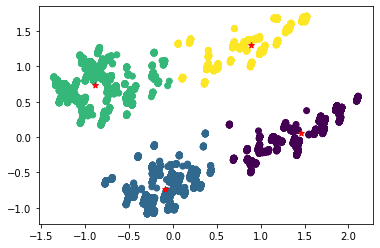

In [38]:
plt.scatter(X_PCA['P1'],X_PCA['P2'],c=labels)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='r')
plt.show()

In [39]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(X_PCA)
    SSE.append(kmeans.inertia_)

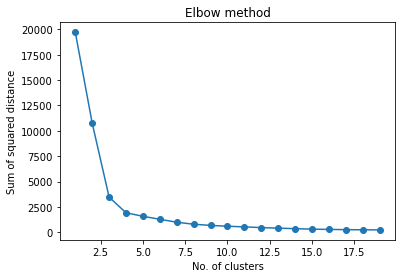

In [40]:
plt.plot(range(1,20),SSE,marker='o')
plt.xlabel('No. of clusters')
plt.ylabel('Sum of squared distance')
plt.title('Elbow method')
plt.show()